<a href="https://colab.research.google.com/github/arnaldobjunior/brain_tumor/blob/main/brain_tumor_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pré-processamento**


In [2]:
#Importando bibliotecas
import glob
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import cv2 as cv
import numpy as np
import random 


# Declarando listas vazias.
train_no = []
train_yes = []
x = []
y = []

# Preenchendo as listas com as imagens.
# A função glob lista as imagens do diretório.
for file in glob.glob('/content/brain_tumor_dataset/no/*.jpg'):
    train_no.append(np.array(cv.resize(cv.imread(file),
                                (224,224), interpolation = cv.INTER_AREA)))
    x.append(np.array(cv.resize(cv.imread(file), 
                                (224,224), interpolation = cv.INTER_AREA)))
for file in glob.glob('/content/brain_tumor_dataset/yes/*.jpg'):
    train_yes.append(np.array(cv.resize(cv.imread(file), 
                                (224,224), interpolation = cv.INTER_AREA)))
    x.append(np.array(cv.resize(cv.imread(file), 
                                (224,224), interpolation = cv.INTER_AREA)))


train_no = np.array(train_no) /255
train_yes = np.array(train_yes) /255
x = np.array(x) /255

# Utilizando o pandas para criar um dataframe.
data_train =pd.DataFrame(columns=['filename','class'])

# Criando uma coluna nova e incluindo os rótulos dos dados.
for file in train_no:
    data_train=data_train.append({'filename':file,
                                  'class':'0'},ignore_index=True)
    y.append(0)
for file in train_yes:
    data_train=data_train.append({'filename':file,
                                  'class':'1'},ignore_index=True)
    y.append(1)

# Embaralhando as linhas
data_shuffle=shuffle(data_train)



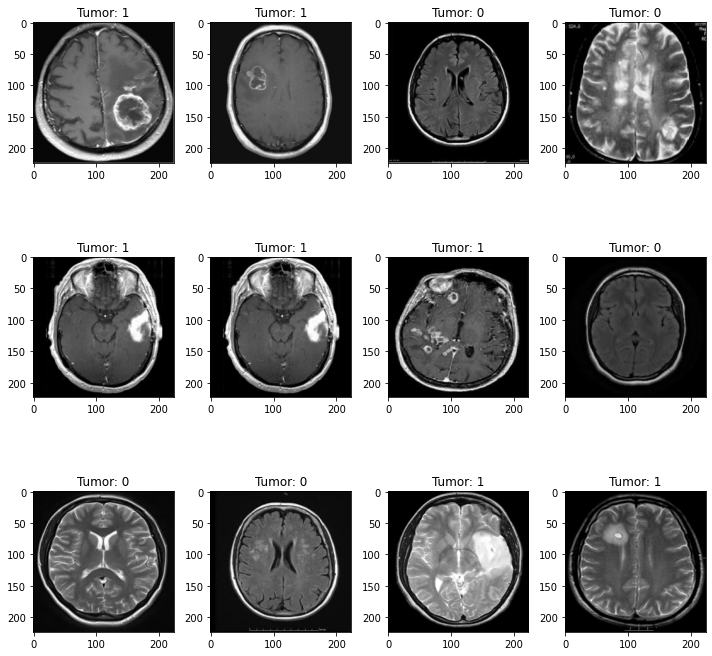

In [3]:
# Plotagem de algumas imagens com seus respectivos rótulos
fig,ax=plt.subplots(3,4)
fig.set_size_inches(10,10)
for i in range(3):
    for j in range (4):
        r = random.randint(1,100)
        ax[i,j].imshow(data_shuffle.iloc[r,0])
        ax[i,j].set_title('Tumor: ' + data_shuffle.iloc[r,1])
        
plt.tight_layout()

In [4]:
from keras.utils import to_categorical

# Criando a categoria classe tumor 0 ou 1
y = to_categorical(y, 2)

# Separando os dados em treino e teste
X_train, X_val, y_train, y_val = train_test_split(x,y, test_size = 0.2, random_state=10)


In [35]:

datagen = ImageDataGenerator(
        zoom_range = 0.1, 
        rotation_range= 15, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True) 
datagen.fit(X_train)



In [31]:
import keras
from keras.layers import *
from keras.models import Model 
from keras import Sequential


# Definindo os layers 
inp = Input((224,224,3))
model = Sequential()
conv1 = Conv2D(64, (2,2), padding='valid', activation= 'relu')(inp)
conv1 = MaxPooling2D(pool_size=(2,2))(conv1)

flat = Flatten()(conv1)

dense1 = Dense(40, activation= 'relu')(flat)
dense1 = Dropout(0.4)(dense1)

dense2 = Dense(12, activation= 'relu')(dense1)
dense2 = Dropout(0.2)(dense2)

# Output layer 
out = Dense(2, activation = 'sigmoid')(dense2)

model = Model(inp, out)

In [36]:
import keras
from keras.layers import *
from keras.models import Model 
from keras import Sequential


# Definindo os layers 
inp = Input((224,224,3))
model = Sequential()
conv1 = Conv2D(64, (2,2), padding='valid', activation= 'relu')(inp)
conv1 = MaxPooling2D(pool_size=(2,2))(conv1)

flat = Flatten()(conv1)

dense1 = Dense(32, activation= 'relu')(flat)
dense1 = Dropout(0.4)(dense1)

# Output layer 
out = Dense(2, activation = 'sigmoid')(dense1)

model = Model(inp, out)

**Treinamento**

In [37]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

filepath="transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', 
                             verbose=0, save_best_only=True, 
                             save_weights_only=False, mode='auto', 
                             period=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss',factor=0.1,
                            min_delta=0.0001 , patience=5, 
                            verbose=1)

model.compile(optimizer = "adam" , loss = "binary_crossentropy", 
                              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size = 20, 
                              epochs = 20, initial_epoch = 0, 
                              validation_data = (X_val, y_val), 
                              callbacks=[lr_reduce, checkpoint])



Epoch 1/20
7/7 [==============================] - 6s 786ms/step - loss: 6.2340 - accuracy: 0.4477 - val_loss: 1.8270 - val_accuracy: 0.7273
Epoch 2/20
7/7 [==============================] - 5s 764ms/step - loss: 2.9971 - accuracy: 0.6420 - val_loss: 0.8432 - val_accuracy: 0.6061
Epoch 3/20
7/7 [==============================] - 5s 767ms/step - loss: 1.0146 - accuracy: 0.7400 - val_loss: 0.5686 - val_accuracy: 0.5758
Epoch 4/20
7/7 [==============================] - 5s 765ms/step - loss: 0.6673 - accuracy: 0.6924 - val_loss: 0.5265 - val_accuracy: 0.7273
Epoch 5/20
7/7 [==============================] - 5s 758ms/step - loss: 0.5442 - accuracy: 0.6782 - val_loss: 0.4902 - val_accuracy: 0.6364
Epoch 6/20
7/7 [==============================] - 5s 756ms/step - loss: 0.4903 - accuracy: 0.7419 - val_loss: 0.5079 - val_accuracy: 0.6061
Epoch 7/20
7/7 [==============================] - 5s 758ms/step - loss: 0.4297 - accuracy: 0.8099 - val_loss: 0.5520 - val_accuracy: 0.6970
Epoch 8/20
7/7 [====

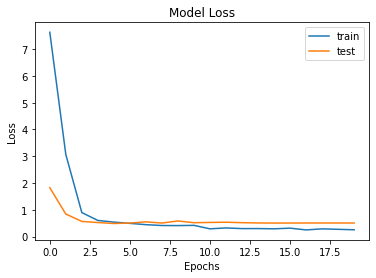

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


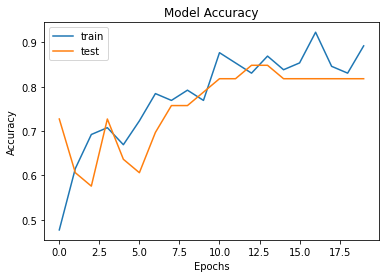

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


**Predição**

Peguei 9 imagens aleatórias e coloquei em uma pasta para que o modelo possa prever se existe um tumor ou não.


In [40]:
teste = []

# Preenchendo as listas com as imagens.
# A função glob lista as imagens do diretório.
for file in glob.glob('/content/brain_tumor_dataset/teste/*.jpg'):
    teste.append(np.array(cv.resize(cv.imread(file), 
                                    (224,224), interpolation = cv.INTER_AREA)))

teste = np.array(teste) 
teste = teste/255

# Utilizando o pandas para criar um dataframe.
data_teste =pd.DataFrame(columns=['filename','class'])

for file in teste:
    data_teste=data_teste.append({'filename':file},ignore_index=True)



In [41]:
# Aplicando o modelo em 9 imagens
pred = model.predict(teste)
predd = np.argmax(pred, axis = 1)
predd = pd.DataFrame(predd).replace({0:'no',1:'yes'})


In [24]:
teste.shape

(9, 224, 224, 3)

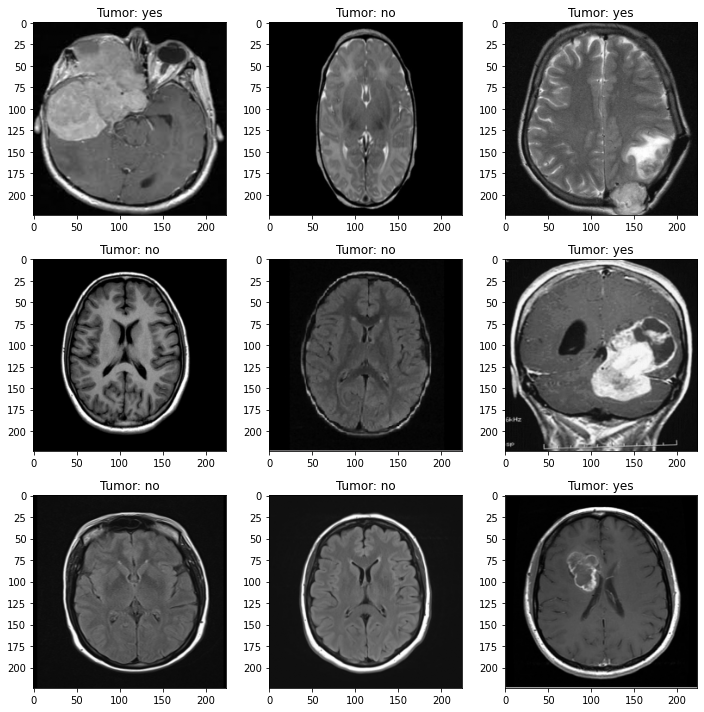

In [42]:
# Plotagem de algumas imagens com seus respectivos rótulos
fig,ax=plt.subplots(3,3)
fig.set_size_inches(10,10)
r = 0
for i in range(3):
    for j in range (3):
        ax[i,j].imshow(data_teste.iloc[r,0])
        ax[i,j].set_title('Tumor: ' + predd.iloc[r,0])
        r = r+1
plt.tight_layout()